In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn
import pandas as pd
import cv2
import sys
import re
from datetime import datetime as dt
import time
import scipy.ndimage as ndi 
sys.path.append('/Users/yves/Documents/Code/mec_ephys/packages')


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
n_bytes = 66257620992

In [3]:
samples_offset = (n_bytes/2/384)

In [4]:
from mecll.rsync import Rsync_aligner


In [7]:
root_path = '/Users/yves/Documents/mecll_data_dir/39951_20210807/'
all_fs = os.listdir(root_path)
position = np.load(os.path.join(root_path,[i for i in os.listdir(root_path) if '_positions.npy' in i][0]))


sync_path_spk = os.path.join(root_path,[i for i in all_fs if i=='timestamps_OF.npy'][0])#'/Users/yves/Downloads/example_files/timestamps.npy'
sync_messages_spk = np.load(sync_path_spk)[::2][:-1].astype('float')


([<matplotlib.axis.XTick at 0x7f972b63b290>,
 <a list of 10 Text xticklabel objects>)

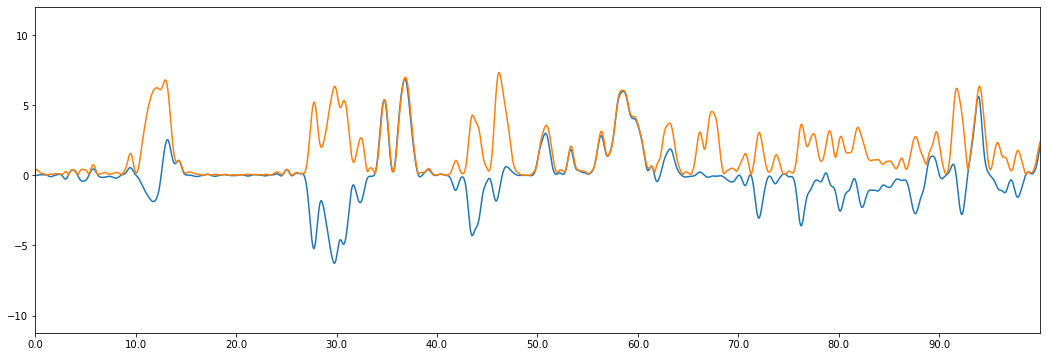

In [8]:
plt.figure(figsize=(18,6))
#position[np.logical_not(np.isfinite(position[:,0])),:] = 0
delta_p = (position[1:] - position[:-1])
delta_p[np.logical_not(np.isfinite(delta_p[:,0])),:] = 0
delta_p[np.sum(np.abs(delta_p),axis=1)>20,:] = 0
#delta_p[np.sum(np.abs(delta_p),axis=1)<2,:] = 0

delta_p = ndi.gaussian_filter1d(delta_p,8,axis=0)
#delta_p[]
speed = np.concatenate([[0],np.sqrt(np.sum(delta_p**2,axis=1))])
plt.plot(delta_p[:,0])
plt.plot(speed)

#plt.plot(ndi.gaussian_filter1d(delta_p[:,0],7))

plt.xlim(0,3000)
plt.xticks(np.arange(0,3000,300),np.arange(0,3000,300)/30.)
#plt.ylim(-10,10)

In [9]:

#load spiking data
#ROOT = '/Users/yves/Downloads/example_files/'
spkT = np.load(os.path.join(root_path,[i for i in all_fs if i=='spike_times.npy'][0])).flatten()
spkC = np.load(os.path.join(root_path,[i for i in all_fs if i=='spike_clusters.npy'][0])).flatten()
cluster_labels = pd.read_table(os.path.join(root_path,[i for i in all_fs if '.tsv' in i][0]))


#select single units
single_units = np.where(cluster_labels.KSLabel=='good')[0]

In [10]:
import scipy as sp
import scipy.signal

In [11]:
cam_sync_path = os.path.join(root_path,[i for i in all_fs if ('OFB' in i and 'pinstate' in i)][0])
sync_df = pd.read_csv(cam_sync_path,header=None)
sync_messages_cam = np.where((sync_df[0].values[1:] - sync_df[0].values[:-1])<0)[0].astype('float')

In [12]:
len(sync_messages_cam)

429

In [13]:
len(sync_messages_spk)

429

In [14]:
#+86272944
aligner = Rsync_aligner(sync_messages_spk+samples_offset,sync_messages_cam,units_A=30/30000.,units_B=1)

In [15]:
single_units = np.where(cluster_labels.KSLabel=='good')[0]

In [16]:
import importlib

In [17]:
import mecll

In [18]:
mecll = importlib.reload(mecll.open_field_analysis.proc_grids)

In [19]:
all_rate_maps = []
for kk,unit in enumerate(single_units):
    sys.stdout.write('\rprocessing unit{}/{}'.format(kk,len(single_units)))
    sys.stdout.flush()
    rate_map = mecll.get_rate_map_nolan(unit,aligner,spkC,spkT,position,smooth=30)
    all_rate_maps.append(rate_map)
    

processing unit2/313

KeyboardInterrupt: 

In [135]:
out = mecll.process_grid_data(all_rate_maps)

Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough

/Users/yves/Documents/Code/mec_ephys/packages/mecll/open_field_analysis/proc_grids.py:94: RuntimeWarning: invalid value encountered in multiply
  length_x = firing_rate_map.shape[1] - 1


Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.
Not enough fields to calculate grid metrics.


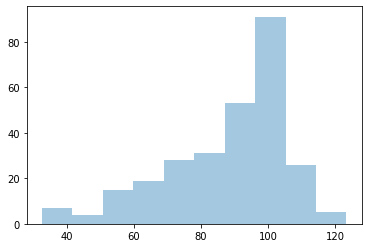

In [147]:
seaborn.distplot(np.array(out['grid_spacing'])[np.isfinite(out['grid_spacing'])],kde=0,bins=10)

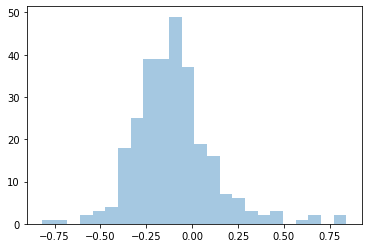

In [148]:
seaborn.distplot(np.array(out['grid_score'])[np.isfinite(out['grid_score'])],kde=0)

In [166]:
np.where(np.array(out['grid_score'])>0.2)[0]

array([ 36,  78,  84,  99, 110, 113, 115, 116, 117, 132, 133, 140, 147,
       161, 220, 258, 265, 266, 270, 274, 275, 291, 312])

In [170]:
out['grid_score'][148]

-0.19817096442223436

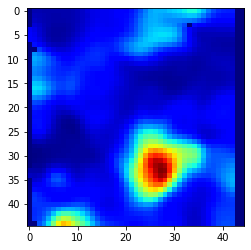

In [171]:
plt.imshow(all_rate_maps[115],cmap='jet')

list index out of range


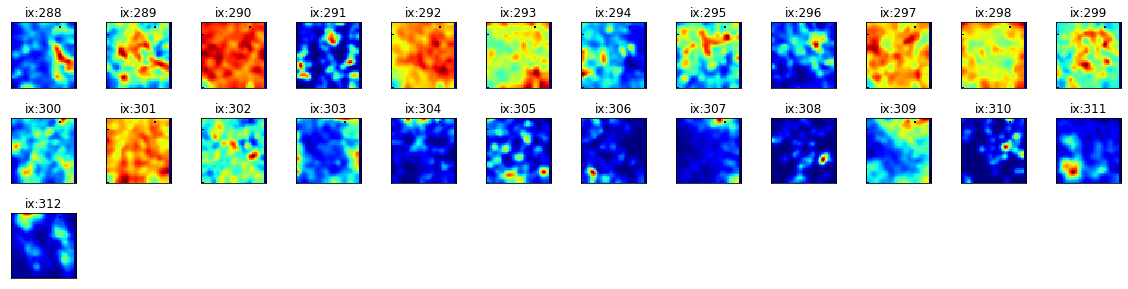

In [168]:
plt.figure(figsize=(16,16))
kk = 1

n64 = 2

for ix in range(n64*144,(n64+1)*144):
    try:
        #unit_nr,resp_map,tot,mx = all_resp_arr[ix]
        resp_map = all_rate_maps[ix]
        plt.subplot(12,12,kk)
        plt.title('ix:{}'.format(ix))
        #plt.title('ix:{} | u:{} | cc:{}  \nn_spk:{} mx:{}'.format(ix,unit_nr,np.round(ccs[ix],decimals=2),tot,np.round(mx,decimals=1)))
        #resp_map = 
        #resp_map[np.isnan(resp_map)] = 0
        plt.imshow(resp_map,cmap='jet',interpolation='None')#,vmin=.0,vmax=.2)
        #plt.xlim(50,1050)
        #plt.ylim(50,1050)
        plt.xticks([])
        plt.yticks([])

        kk += 1
    except Exception as e:
        print(e)
        break
plt.tight_layout()

In [172]:
len([ 36,  78,  84,  99, 113, 115, 116, 117, 132, 133, 140, 148,
       220, 258, 265, 270, 274, 275, 312])

19

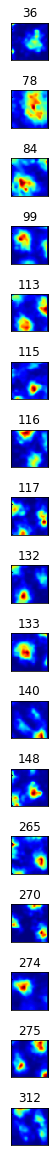

In [182]:
kk = 1
plt.figure(figsize=(9,18))
for i in [ 36,  78,  84,  99, 113, 115, 116, 117, 132, 133, 140, 148,
       265, 270, 274, 275, 312]:
    plt.subplot(19,1,kk)
    plt.title(i)
    plt.imshow(all_rate_maps[i],cmap='jet')
    kk+=1
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()